In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
import os

In [2]:
path = r"C:/Users/siddh/Desktop/analytics/ECEN 689/Challenge5 SVM"
df_train =  pd.read_csv(path+"/5challenge_training_sid.1996.csv") 
df_test = pd.read_csv(path+"/5challenge_testing_sid.1996.csv")

In [3]:
df_test.drop('Unnamed: 0',axis = 1,inplace = True)
df_train.drop('Unnamed: 0',axis = 1,inplace = True)
print(df_test.shape)
print(df_train.shape)

(200, 3)
(200, 3)


In [4]:
## 
df_train.head(10)

,Class,Feature 0,Feature 1
0,0,0.275295,-2.104692
1,1,-1.983230,-1.861172
2,1,2.588412,2.405756
3,1,0.662967,-0.337006
4,0,-0.291951,-1.137968
5,1,1.267904,1.119592
6,1,-0.180978,0.097278
7,0,-1.200269,0.843602
8,0,-0.387257,-0.554008
9,1,3.329670,3.098704


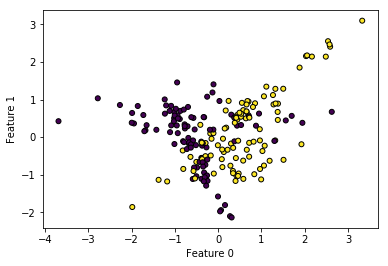

In [5]:
## Plotting the dataset

X1 = df_train[['Feature 0', 'Feature 1']].values
Y1 = df_train['Class'].values
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.xlabel(df_train.columns.values[1])
plt.ylabel(df_train.columns.values[2]);
plt.show()

### A linear hyperplane doesn't look optimal from the figure above

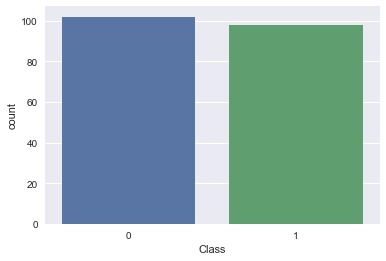

In [6]:
## Check the count of both the classes, as imbalanced proportion of classes require some separate sampling techniques

import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df_train)
plt.show()

In [7]:
## In this notebook, linear, polynomial and RBF kernel methods will be used
## Adapted from Aneesha Bakharia's medium post on svm parameter tuning using gridsearchCV
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X,y,nfolds,kernel='rbf'):
    Cs = [0.001,0.005, 0.01, 0.05, 0.1,0.25,0.5,0.75,1,5,10]
    gammas = [0.001,0.005, 0.01, 0.05,0.075, 0.1,0.25,0.5,0.75, 1,5, 10]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel=kernel), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    print('Best score for data1:', grid_search.best_score_) 
    return grid_search.best_params_

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [8]:
## Let's try the linear,polynomial and rbf kernal
## RBF kernel
svc_param_selection(X1,Y1,10,kernel = 'rbf')

Best score for data1: 0.875


{'C': 10, 'gamma': 0.75}

In [9]:
## linear kernel
svc_param_selection(X1,Y1,10,kernel = 'linear')

Best score for data1: 0.805


{'C': 5, 'gamma': 0.001}

In [10]:
## polynomial kernel
svc_param_selection(X1,Y1,10,kernel = 'poly')

Best score for data1: 0.77


{'C': 0.1, 'gamma': 1}

#### The best parameters is RBF kernel with 'C': 10, 'gamma': 0.75. Now, we'll use these parameters to predict the testing set

In [11]:
sv = svm.SVC(kernel = 'rbf',C =10,gamma = 0.75)
sv.fit(X1,Y1)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.75, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
predictions = sv.predict(df_test[['Feature 0', 'Feature 1']].values)

In [13]:
df_test['Class'] = predictions

In [ ]:
df_test.to_csv("5challenge_testing_sid.1996.csv")

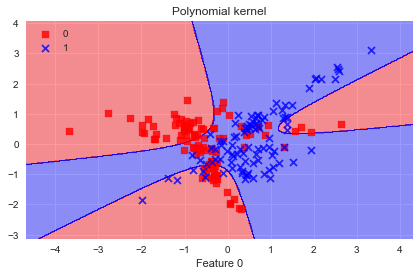

In [30]:

# Visualize the decision boundaries
## Polynomial kernel

plot_decision_regions(X1, Y1, classifier=svm.SVC(kernel='poly',C= 0.1, gamma = 1).fit(X1,Y1))
plt.legend(loc='upper left')
plt.xlabel("Feature 0")
plt.title("Polynomial kernel")
plt.tight_layout()
plt.show()

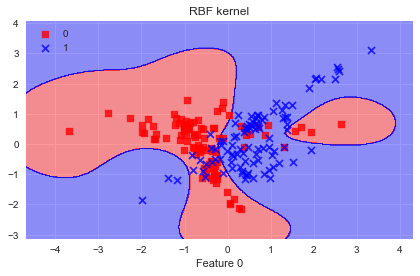

In [32]:
# Visualize the decision boundaries
## RBF kernel

plot_decision_regions(X1, Y1, classifier=sv)
plt.legend(loc='upper left')
plt.xlabel("Feature 0")
plt.title("RBF kernel")
plt.tight_layout()
plt.show()

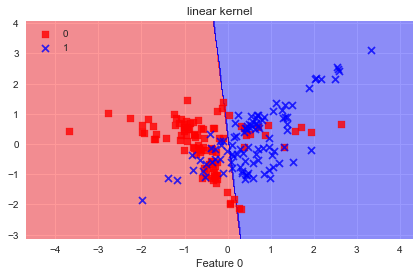

In [33]:
# Visualize the decision boundaries
## Linear kernel

plot_decision_regions(X1, Y1, classifier=svm.SVC(kernel='linear',C= 5, gamma = 0.001).fit(X1,Y1))
plt.legend(loc='upper left')
plt.xlabel("Feature 0")
plt.title("linear kernel")
plt.tight_layout()
plt.show()

In [21]:
## Taken from Chris Albon's blog 
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')